In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()

# Load the CSV file
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()


Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Assuming 'df' is your DataFrame loaded from 'diabetes.csv'
# Extract features (X) and target (y) from the DataFrame

# Assuming 'Outcome' is the name of the target column in your dataset:
X = df.drop('Outcome', axis=1)  # Features are all columns except 'Outcome'
y = df['Outcome']              # Target is the 'Outcome' column

# Now you can perform the train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create SVM classifier
svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly', or 'sigmoid'

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
# Predict on test set
y_pred = svm_model.predict(X_test)


In [8]:
# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[80 19]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



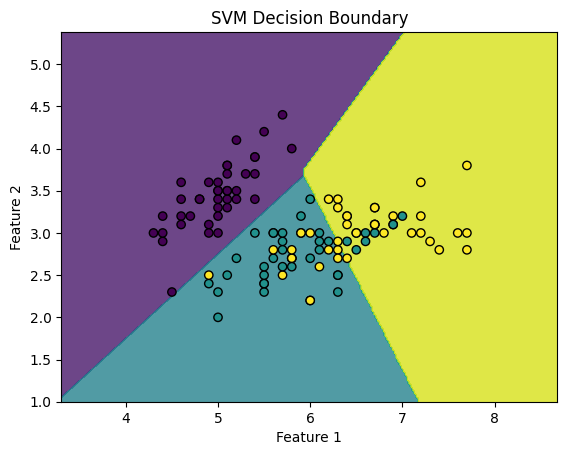

In [10]:
# Use only 2 features for visualization
from sklearn.datasets import load_iris # Import the load_iris function
iris = load_iris() # Load the iris dataset
X_vis = iris.data[:, :2]
y_vis = iris.target

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_train_vis, y_train_vis)

# Plotting decision boundaries
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_train_vis, y_train_vis, svm_vis)